In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("D:\\data ANALYTICS AND SCIENCE\\ASSIGN\\project data\\car\\Car_data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### DATA CLEANING ####

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
# PERCENTAGE OF MISSING DATA
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)
percent_nan


Engine Fuel Type     0.025180
Number of Doors      0.050361
Engine Cylinders     0.251805
Engine HP            0.579151
Market Category     31.408427
dtype: float64

In [11]:
# CHECKING ROWS WHERE ENGINE FUEL TYPE IS MISSING
missing_fuel_type = df['Engine Fuel Type'].isnull()
missing_fuel_type_rows = df[missing_fuel_type]
missing_fuel_type_rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [12]:
# CHECKING ROWS WHERE ENGINE CYLINDERS ARE MISSSING 
missing_cylinder_type = df['Engine Cylinders'].isnull()
missing_cylinder_type_rows = df[missing_cylinder_type]
missing_cylinder_type_rows


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


**so NaN presence is in different rows for different feature.**

In [13]:
# DROPPING ROWS WHERE THERE IS 2 NaN or more 
# Create a boolean mask for rows with at least two missing values
mask = df[['Engine Fuel Type', 'Number of Doors', 'Engine Cylinders', 'Engine HP', 'Market Category']].isnull().sum(axis=1) >= 2

# Select the rows where the mask is True
rows_with_two_missing_values = df[mask]

# Drop the rows with at least two missing values
df_cleaned = df.drop(rows_with_two_missing_values.index)

df_cleaned


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [14]:
df_cleaned.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              52
Engine Cylinders       29
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3728
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [15]:
# since market category was  a string column we used 'None' to impute it 
df_cleaned['Market Category'] = df_cleaned['Market Category'].fillna('None')


In [16]:
missing_doors = df_cleaned['Number of Doors'].isnull()
missing_doors_rows = df_cleaned[missing_doors]

# Shift the rows up and down by 2 rows
above_rows = df_cleaned.shift(-2)[missing_doors]
below_rows = df_cleaned.shift(2)[missing_doors]

# Concatenate the rows into a single DataFrame
result = pd.concat([above_rows, missing_doors_rows, below_rows])
result


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2015.0,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Large,Coupe,16.0,11.0,2774.0,295000.0
4666,Ferrari,FF,2013.0,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16.0,11.0,2774.0,295000.0
4666,Ford,Festiva,1993.0,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38.0,30.0,5657.0,2000.0


**since below and above rows where 'Number of Doors'= NaN have value 2 i am going to umpute the NaN column with 2** 

In [17]:
df_cleaned['Number of Doors'] = df_cleaned['Number of Doors'].fillna(2)


In [18]:
df_cleaned['Engine Cylinders'] = df_cleaned['Engine Cylinders'].fillna(0)


In [19]:
df_cleaned.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            52
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [20]:
#Filling missing engine hp value with mean of the column value of engine hp
mean_engine_hp = df_cleaned['Engine HP'].mean()
df_cleaned['Engine HP'] = df_cleaned['Engine HP'].fillna(mean_engine_hp)


In [21]:
df_cleaned.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

**ALL VALUES ARE CLEANED NOW** 

In [22]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [23]:
import os

current_directory = os.getcwd()
print(current_directory)

C:\Users\Sayak23


In [24]:
df_cleaned.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [25]:
df_cleaned=pd.get_dummies(df_cleaned)

In [26]:
# making train_dataset 
train=df_cleaned[0:8000] 

In [27]:
# making test dataset
test=df_cleaned[8000:]

In [28]:
x_train=train.drop('MSRP',axis=1)

In [29]:
y_train=train['MSRP']

In [30]:
x_test=test.drop('MSRP',axis=1)

In [31]:
final_pred=test['MSRP']

In [32]:
x_train=pd.get_dummies(x_train)

In [33]:
x_train.shape

(8000, 1079)

In [34]:
x_test=pd.get_dummies(x_test)

In [35]:
x_test.shape

(3894, 1079)

In [36]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = lreg.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(final_pred, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE SCORE:", rmse)


RMSE SCORE: 98605822447.0132


In [38]:
lreg.predict(x_test)

array([1.97331182e+04, 1.94012461e+04, 1.94012461e+04, ...,
       2.07714143e+11, 2.07714143e+11, 3.35721861e+10])

**In this case, the large RMSE score may indicate that the linear regression model is not capturing the underlying patterns and relationships in the data effectively. It could be a result of various factors such as the model's inability to capture nonlinear relationships, presence of outliers, or inadequate feature selection.Therefore I will perform gradient boost algorithm** 

### GRADIENT BOOST ### 

In [40]:
# Initialize the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()

# Train the model on the training set
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Calculate RMSE
rmse = mean_squared_error(final_pred, y_pred, squared=False)
print("RMSE Score:", rmse)


RMSE Score: 45532.852744038406


**We can see a huge reduction over RMSE score.Hence Grdient Boost performs well in this dataset**

In [41]:
# Get the coefficients from the trained linear regression model
coefficients = lreg.coef_
# Create a dataframe with feature names and coefficients
feature_coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': coefficients})
# Sort the dataframe by absolute coefficient values
feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients = feature_coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
feature_coefficients

,Feature,Coefficient,Absolute_Coefficient
987,Driven_Wheels_rear wheel drive,-3.388097e+12,3.388097e+12
986,Driven_Wheels_front wheel drive,-3.388097e+12,3.388097e+12
985,Driven_Wheels_four wheel drive,-3.388097e+12,3.388097e+12
984,Driven_Wheels_all wheel drive,-3.388097e+12,3.388097e+12
8,Make_Alfa Romeo,-6.994931e+11,6.994931e+11
...,...,...,...
918,Model_WRX,0.000000e+00,0.000000e+00
919,Model_Windstar,0.000000e+00,0.000000e+00
920,Model_Windstar Cargo,0.000000e+00,0.000000e+00
921,Model_Wraith,0.000000e+00,0.000000e+00


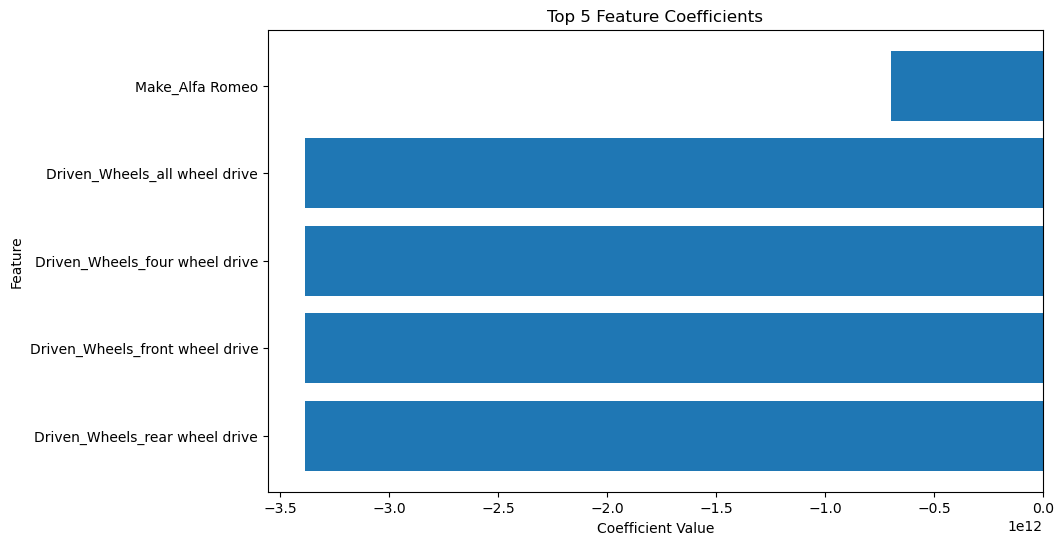

In [42]:
import matplotlib.pyplot as plt

# Select the top 5 feature coefficients
top_5_features = feature_coefficients.head(5)

# Create a bar chart for the top 5 feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 5 Feature Coefficients')
plt.show()



In [43]:
# Select the numeric features
numeric_features = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numeric_features].corr()

# Find the feature with the highest correlation to MSRP
highest_corr_feature = correlation_matrix['MSRP'].abs().idxmax()
highest_corr_value = correlation_matrix['MSRP'].abs().max()

# Print the highest correlated feature and its correlation value
print(f"The feature with the highest correlation to MSRP is '{highest_corr_feature}' with a correlation value of {highest_corr_value}.")


The feature with the highest correlation to MSRP is 'MSRP' with a correlation value of 1.0.


In [44]:
# Create a dataframe with the selected numeric features and the target variable
numeric_features = df_cleaned[['Engine HP', 'Engine Cylinders','highway MPG', 'city mpg', 'Popularity', 'MSRP']]

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Extract the correlation values of the numeric features with the target variable
correlation_with_msrp = correlation_matrix['MSRP'].drop('MSRP')

# Sort the correlation values in descending order
correlation_with_msrp_sorted = correlation_with_msrp.abs().sort_values(ascending=False)

# Print the sorted correlation values
print(correlation_with_msrp_sorted)


Engine HP           0.661752
Engine Cylinders    0.529566
city mpg            0.167916
highway MPG         0.167470
Popularity          0.048312
Name: MSRP, dtype: float64


**I Have also added vehicle styles as the X values and the MSRP as the Y values.**